In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold , cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error, r2_score, confusion_matrix, classification_report,mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.tree import plot_tree as spt
from xgboost import plot_tree

In [2]:
#import datasets and convert it to dataframe
bankData = pd.read_csv("bank-full.csv", sep=";")
bank = pd.DataFrame(bankData)

In [3]:
#data info 
bankDataInfo = bank.info()
print (f"data info: {bankDataInfo}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
data info: None


In [4]:
#description of the data
bankDataDescribe = bank.describe()
print(bankDataDescribe)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [5]:
#for checking the unique values in the datasets
for col in bank.select_dtypes(include='object').columns:
    print(f"{col}: {bank[col].unique()}")

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [6]:
# to calculate the unknown value its important or not
for col in bank.columns:
    if 'unknown' in bank[col].unique():
        print(f"unknown: {col}: {(bank[col] == 'unknown').mean()*100:.2f}%")


unknown: job: 0.64%
unknown: education: 4.11%
unknown: contact: 28.80%
unknown: poutcome: 81.75%


In [7]:
# to calculate the other value its important or not
for col in bank.columns:
    if 'other' in bank[col].unique():
        print(f"other: {col}: {(bank[col] == 'other').mean()*100:.2f}%")
        

other: poutcome: 4.07%


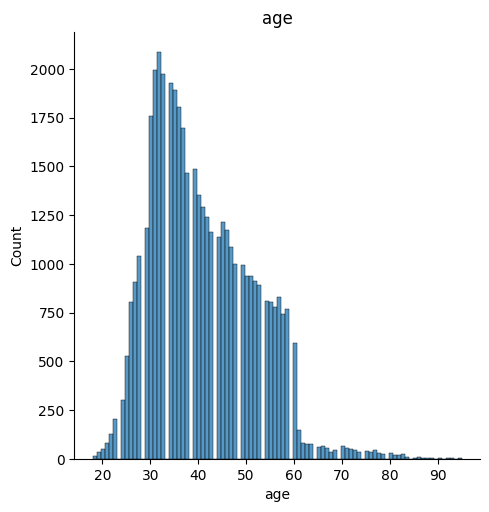

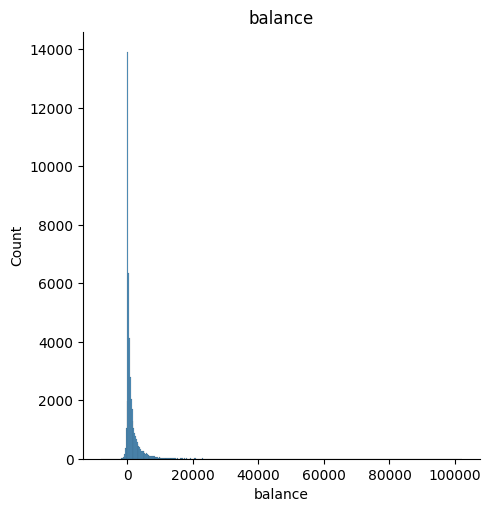

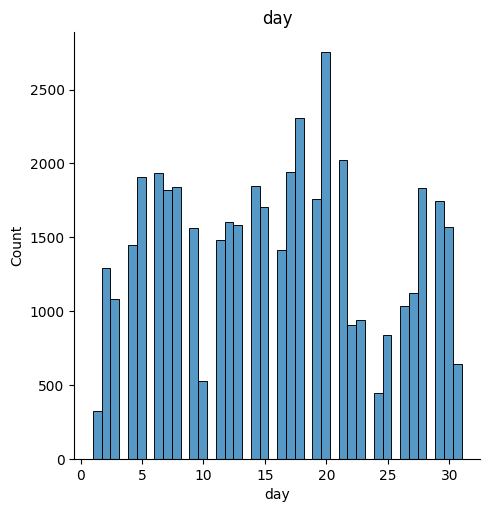

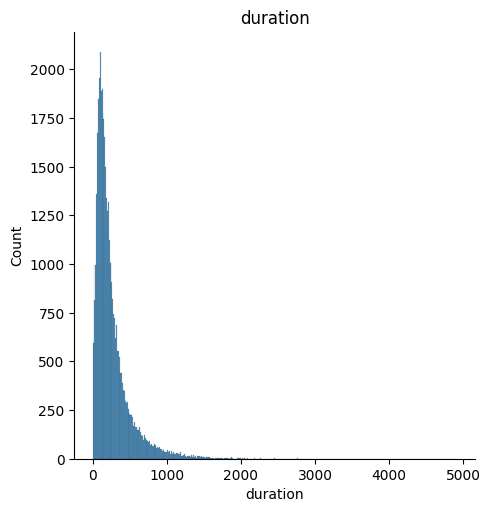

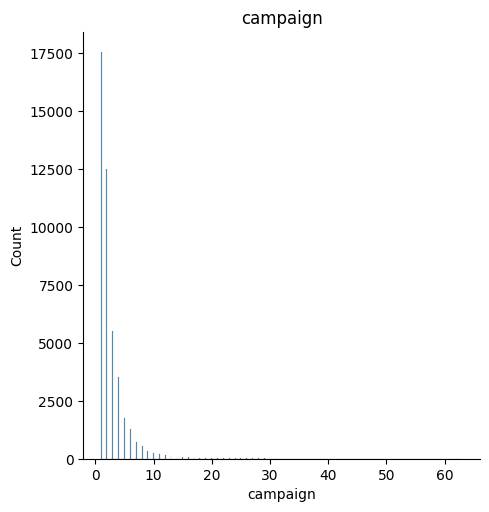

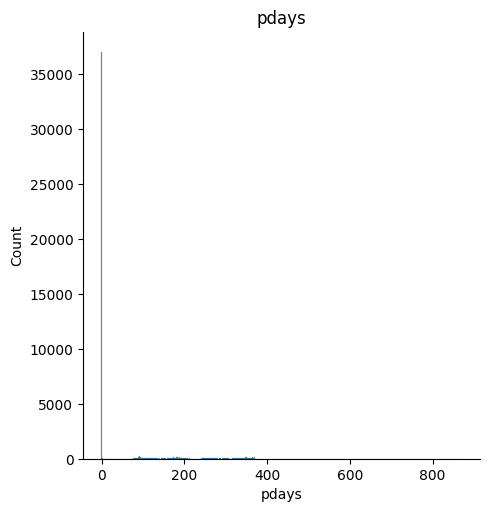

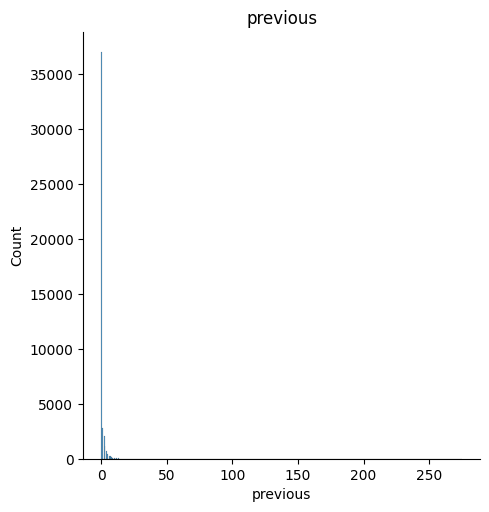

In [8]:
# to check the values 
for col in bank.select_dtypes(include='number').columns:
    sns.displot(x=bank[col])
    plt.title(col)
    plt.show()

In [9]:
#to know if there any duplicated values
print(f"duplicated count: {bank.duplicated().sum()}")

duplicated count: 0


In [10]:
#to make the target label be 0 and 1
bank['y'] = bank['y'].apply(lambda x: 1 if x == 'yes' else 0)


In [11]:
#to know if the agent is new or already wa called before 
bank['was_contacted'] = bank['pdays'].apply(lambda x: 0 if x == -1 else 1)


In [12]:
#to encode the object data type to numerical 
categorical_cols = bank.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    bank[col] = le.fit_transform(bank[col])


In [13]:
#define features and label
X = bank.drop('y', axis=1)
y = bank['y']

In [14]:
#split the data to 80% training and 20% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
#apply standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [17]:
#cross valdiation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
#regression models
linear_models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (deg=2)': LinearRegression(),
    'SVR': SVR(),
    'Logistic Regression': LogisticRegression(max_iter=1000) 
}

In [19]:
# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_selected)
X_poly_test = poly.transform(X_test_selected)

In [20]:
#dictionary for regression models
results = {}

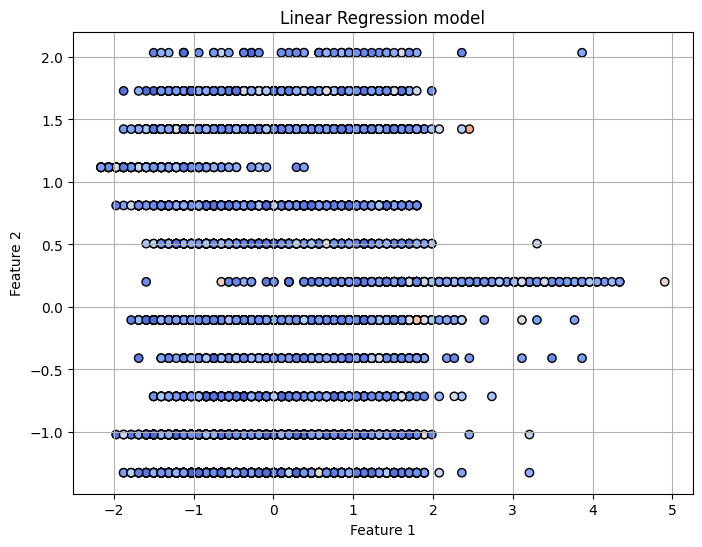

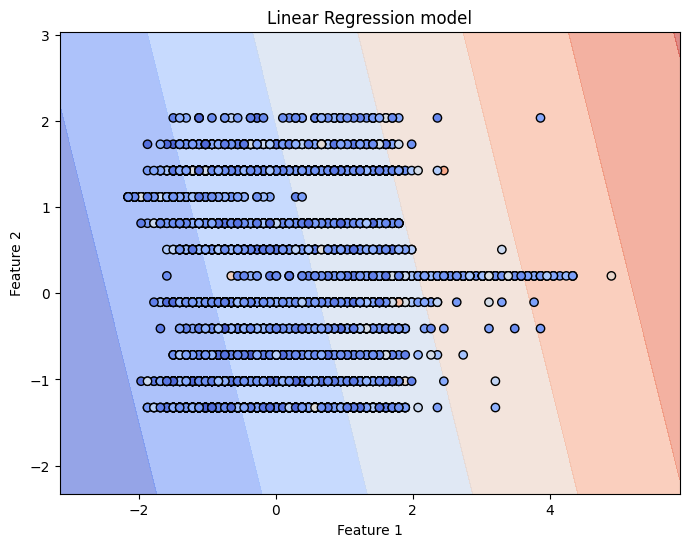

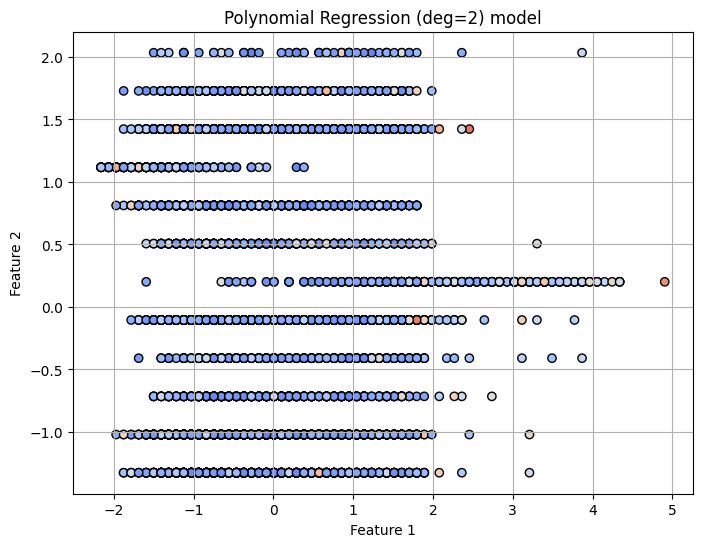

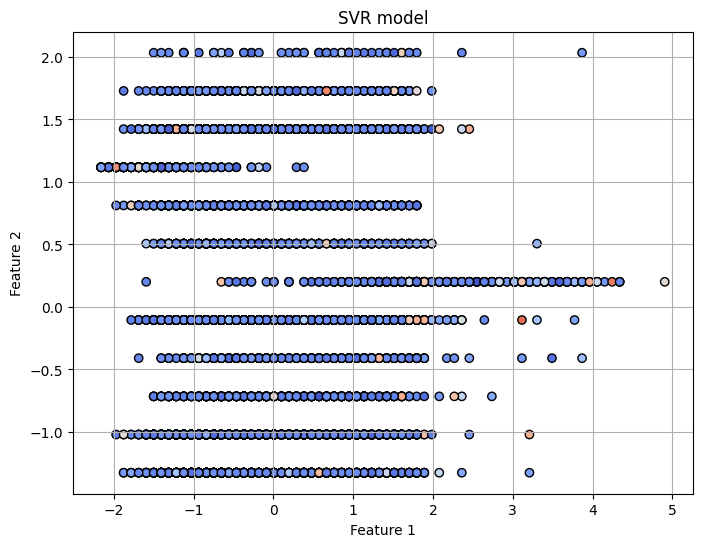

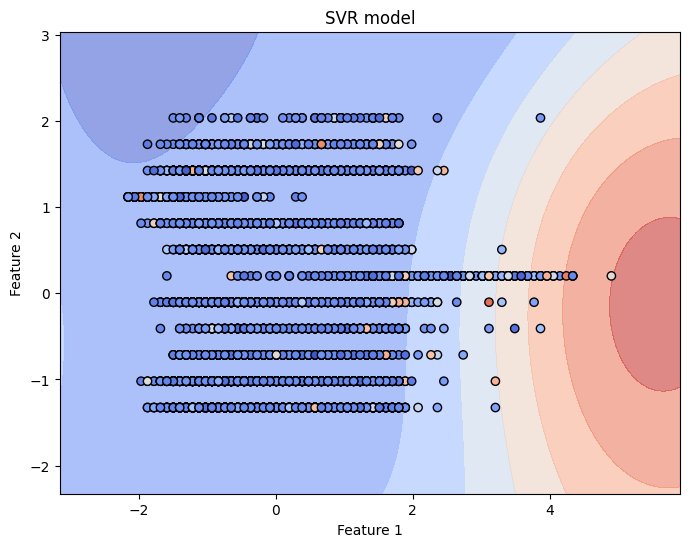

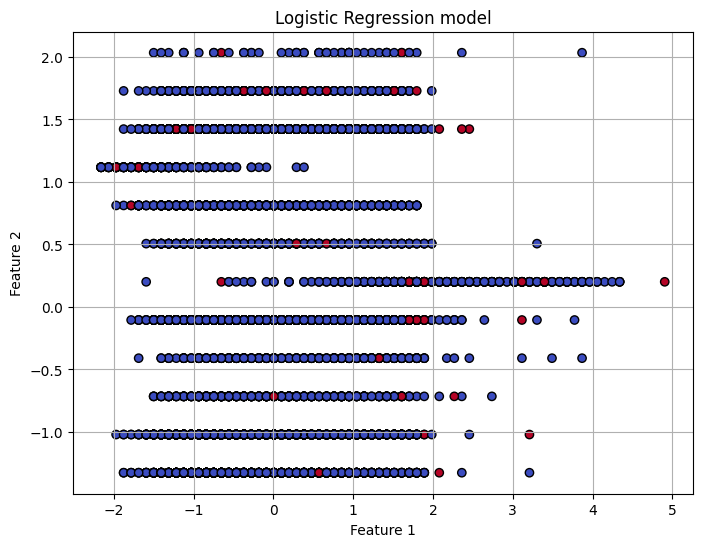

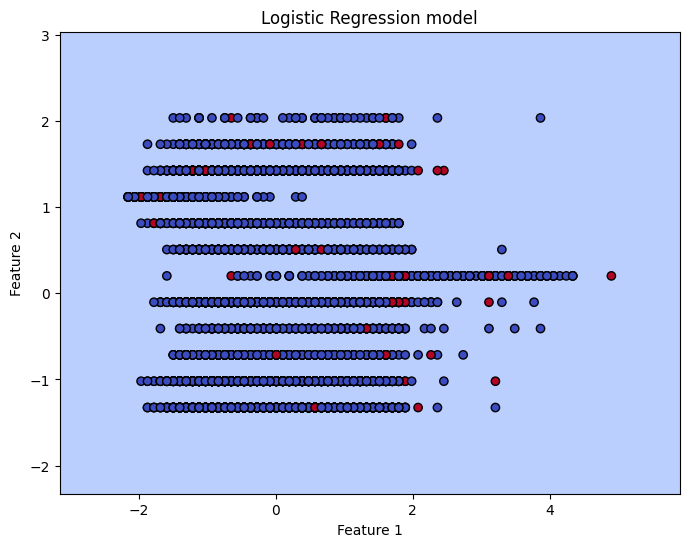

In [28]:
#train the data for each regrssion model without cross validation
for name, model in linear_models.items():
    if name == 'Polynomial Regression (deg=2)':
        model.fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)

        plt.figure(figsize=(8,6))
        plt.scatter(X_test_selected[:, 0], X_test_selected[:, 1], c=y_pred, cmap=plt.cm.coolwarm, edgecolors='k')
        plt.title(f"{name} model")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid(True)
        plt.show()

    else:
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)

        X_vis_test = X_test_selected[:, :2]

        plt.figure(figsize=(8,6))
        plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm, edgecolors='k')
        plt.title(f"{name} model")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid(True)
        plt.show()

        x_min, x_max = X_vis_test[:, 0].min() - 1, X_vis_test[:, 0].max() + 1
        y_min, y_max = X_vis_test[:, 1].min() - 1, X_vis_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        X_grid = np.zeros((xx.ravel().shape[0], X_train_selected.shape[1]))
        X_grid[:, 0] = xx.ravel()
        X_grid[:, 1] = yy.ravel()
        X_grid[:, 2:] = X_train_selected[:, 2:].mean(axis=0)

        Z = model.predict(X_grid)
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
        plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm, edgecolors='k')
        plt.title(f"{name} model")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2 , 'MSE' : mse , 'MAE' : mae}


In [29]:
# Cross-validation
cv_results = {}

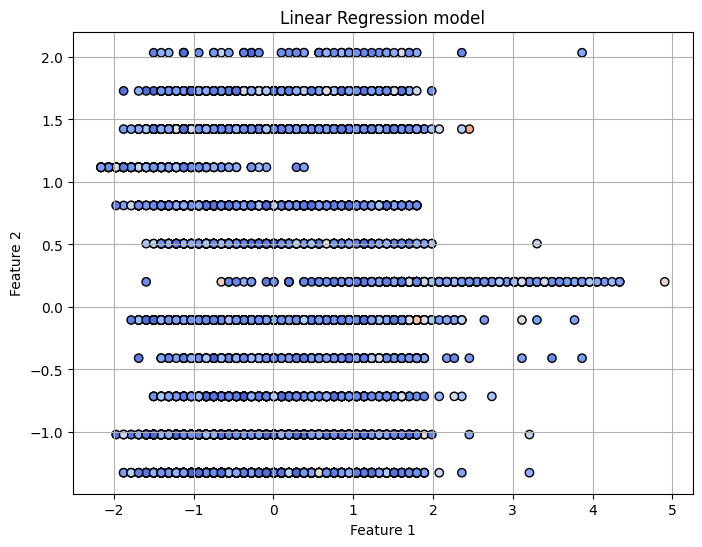

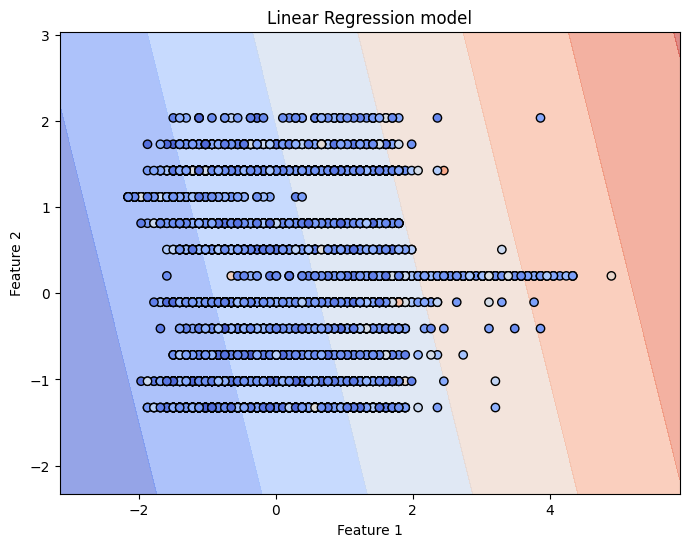

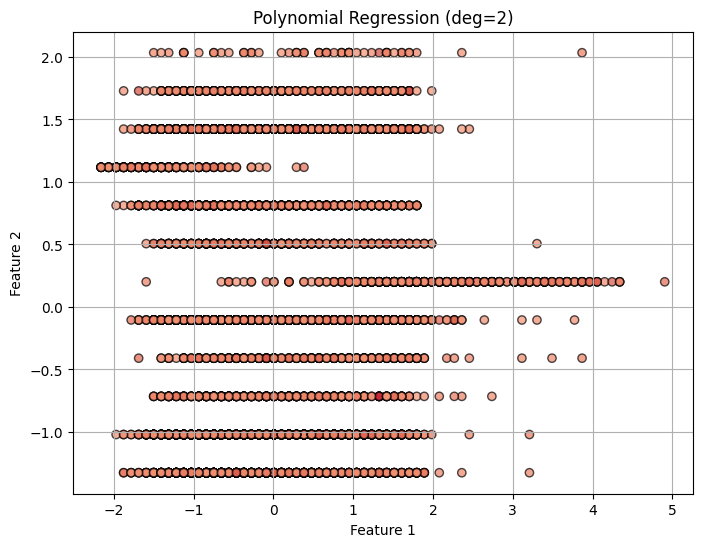

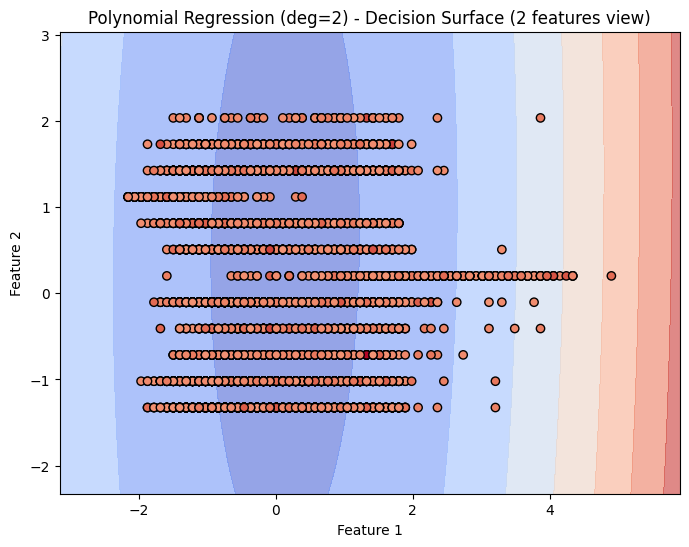

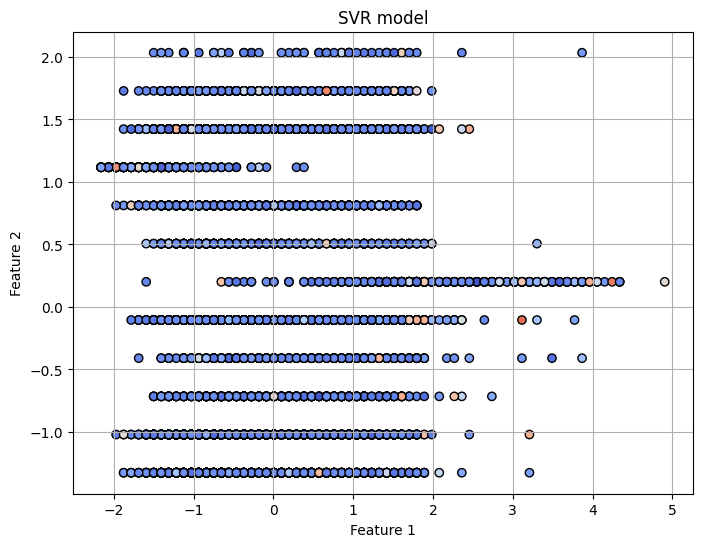

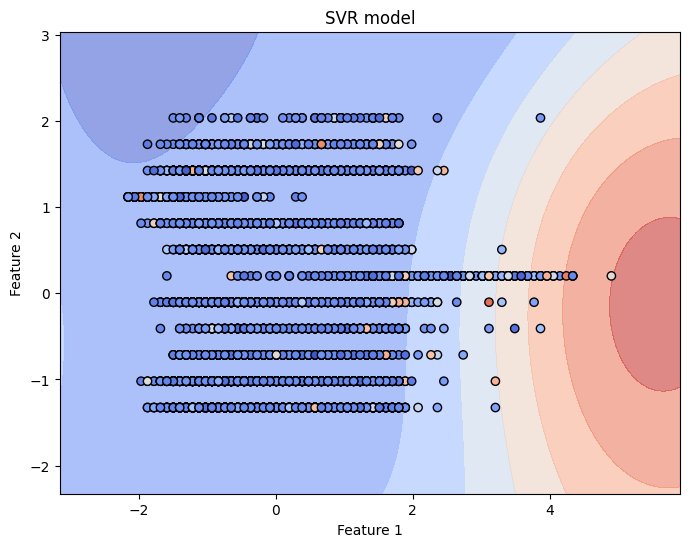

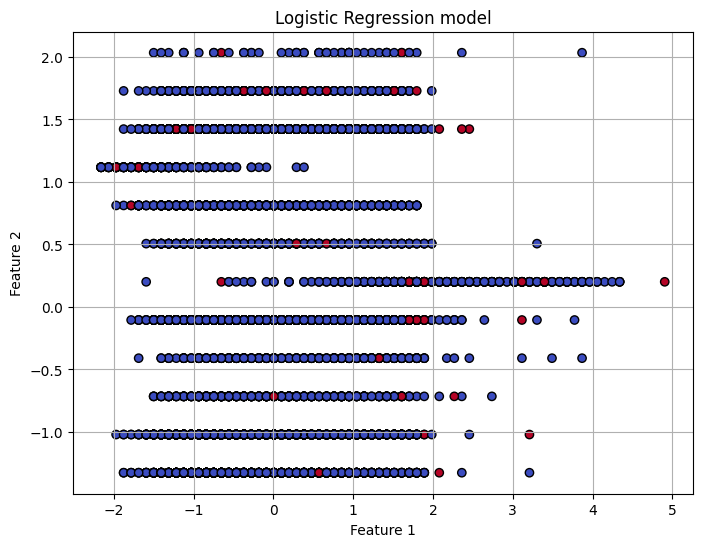

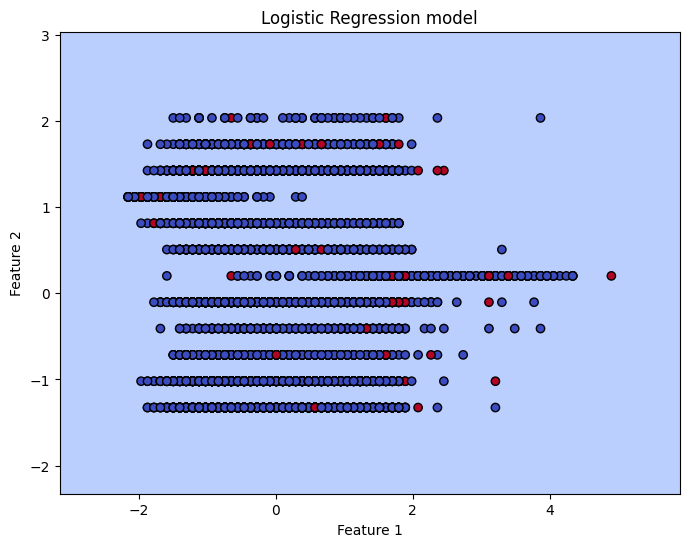

In [33]:
#trian the data for each model with cross validatioon
for name, model in linear_models.items():
    if name == 'Polynomial Regression (deg=2)':
        X_cv = X_poly_train
        scores = cross_val_score(model, X_poly_train, y_train, cv=cv, scoring='neg_mean_squared_error')
        y_pred = cross_val_predict(model, X_poly_train, y_train, cv=cv)

        X_vis_test = X_test_selected[:, :2]

        plt.figure(figsize=(8,6))
        plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1],
                    c=y_pred[:len(X_vis_test)], cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.7)
        plt.title("Polynomial Regression (deg=2)")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid(True)
        plt.show()

        x_min, x_max = X_vis_test[:, 0].min() - 1, X_vis_test[:, 0].max() + 1
        y_min, y_max = X_vis_test[:, 1].min() - 1, X_vis_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                            np.linspace(y_min, y_max, 200))

        X_grid = np.zeros((xx.ravel().shape[0], X_train_selected.shape[1]))
        X_grid[:, 0] = xx.ravel()
        X_grid[:, 1] = yy.ravel()
        X_grid[:, 2:] = X_train_selected[:, 2:].mean(axis=0)

        X_grid_poly = PolynomialFeatures(degree=2).fit_transform(X_grid)
        Z = model.fit(X_cv, y_train).predict(X_grid_poly)
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
        plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1],
                    c=y_pred[:len(X_vis_test)], cmap=plt.cm.coolwarm, edgecolors='k')
        plt.title("Polynomial Regression (deg=2) - Decision Surface (2 features view)")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()
    else:
        X_cv = X_train_selected
        scores = cross_val_score(model, X_train_selected, y_train, cv=cv, scoring='neg_mean_squared_error')
        y_pred = cross_val_predict(model, X_train_selected, y_train, cv=cv)

        X_vis_train = X_train_selected[:, :2]
        X_vis_test = X_test_selected[:, :2]

        plt.figure(figsize=(8,6))
        plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=model.fit(X_cv, y_train).predict(X_test_selected), cmap=plt.cm.coolwarm, edgecolors='k')
        plt.title(f"{name} model")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid(True)
        plt.show()

        x_min, x_max = X_vis_test[:, 0].min() - 1, X_vis_test[:, 0].max() + 1
        y_min, y_max = X_vis_test[:, 1].min() - 1, X_vis_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        X_grid = np.zeros((xx.ravel().shape[0], X_train_selected.shape[1]))
        X_grid[:, 0] = xx.ravel()
        X_grid[:, 1] = yy.ravel()
        X_grid[:, 2:] = X_train_selected[:, 2:].mean(axis=0)

        Z = model.fit(X_cv, y_train).predict(X_grid)
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
        plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=model.fit(X_cv, y_train).predict(X_test_selected), cmap=plt.cm.coolwarm, edgecolors='k')
        plt.title(f"{name} model")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()
        
    rmse_cross_validation = np.sqrt(-cross_val_score(model, X_cv, y_train, cv=cv, scoring='neg_mean_squared_error'))
    r2_cross_validation = cross_val_score(model, X_cv, y_train, cv=cv, scoring='r2')
    mae_cross_validation = -cross_val_score(model, X_cv, y_train, cv=cv, scoring='neg_mean_absolute_error')
    mse_cross_validation = -cross_val_score(model, X_cv, y_train, cv=cv, scoring='neg_mean_squared_error')

    cv_results[name] = {
        'CV RMSE': rmse_cross_validation,
        'CV R2': r2_cross_validation,
        'CV MAE': mae_cross_validation,
        'CV MSE': mse_cross_validation,
    }


In [34]:
#display evaluation without cross validation
print("normal test results:")
for name, metrics in results.items():
    print(f"{name}: RMSE={metrics['RMSE']}, R2={metrics['R2']}, MSE={metrics['MSE']}, MAE={metrics['MAE']}")


normal test results:
Linear Regression: RMSE=0.27969682189138106, R2=0.262607012867904, MSE=0.07823031217613893, MAE=0.1714163063955399
Polynomial Regression (deg=2): RMSE=0.2741551602831576, R2=0.2915376272686734, MSE=0.07516105190988386, MAE=0.16644078348256836
SVR: RMSE=0.2838184639183759, R2=0.24071428339438117, MSE=0.08055292046098644, MAE=0.1588737906988949
Logistic Regression: RMSE=0.3199994470856663, R2=0.03478870473067541, MSE=0.10239964613513215, MAE=0.10239964613513215


In [35]:
#display evaluation with cross validation
for name, metrics in cv_results.items():
    print(f"\n{name} cross validation results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")


Linear Regression cross validation results:
CV RMSE: [0.27666886 0.27942725 0.26783364 0.27738825 0.27933582]
CV R2: [0.2633161  0.24238036 0.28089215 0.24492851 0.25217497]
CV MAE: [0.16886069 0.17160577 0.16303652 0.16872192 0.16854481]
CV MSE: [0.07654566 0.07807959 0.07173486 0.07694424 0.0780285 ]

Polynomial Regression (deg=2) cross validation results:
CV RMSE: [0.27015088 0.27173749 0.26145741 0.27523581 0.27212635]
CV R2: [0.29761797 0.28350559 0.31472371 0.25660125 0.29027851]
CV MAE: [0.16226616 0.16693085 0.15773905 0.16319798 0.16369554]
CV MSE: [0.0729815  0.07384126 0.06835998 0.07575475 0.07405275]

SVR cross validation results:
CV RMSE: [0.28043634 0.28350999 0.27161688 0.28016466 0.28166546]
CV R2: [0.24311622 0.22007932 0.26043339 0.22973767 0.2396493 ]
CV MAE: [0.15529605 0.15904221 0.1478134  0.15509094 0.15701653]
CV MSE: [0.07864454 0.08037791 0.07377573 0.07849224 0.07933543]

Logistic Regression cross validation results:
CV RMSE: [0.31350578 0.31918648 0.309064

In [36]:
#classification models
classification_models = {
    'KMeans (Clustering)': {'n_init': [10, 20],'max_iter': [300, 500]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'RandomForest': {'n_estimators': [100, 500], 'max_depth': [ 4 , 8 , 10 , 15 , None]},
    'XGBoost': {'n_estimators': [100, 500], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7 , 10 , 12 , 15]}
}


In [37]:
#dictionary for classification models
classification_result = {}


Processing KMeans (Clustering)


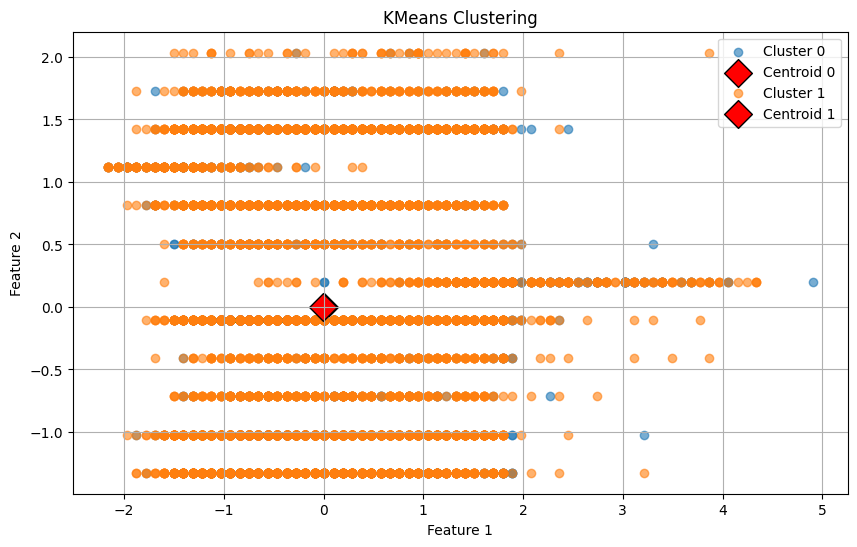

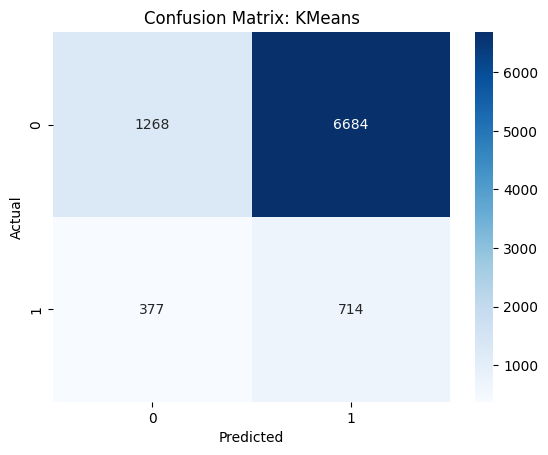

In [39]:
print("\nProcessing KMeans (Clustering)")

model = KMeans(n_clusters=2, random_state=42)
grid = GridSearchCV(model, classification_models['KMeans (Clustering)'], cv=3)
grid.fit(X_train_selected)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)
classification_result['KMeans (Clustering)'] = {
    'Best Params': grid.best_params_,
    'Confusion Matrix': cm
}

new_points = X_test_selected[:, :2]
labels = y_pred
centroids = best_model.cluster_centers_[:, :2]  

plt.figure(figsize=(10, 6))
for cluster_id in range(best_model.n_clusters):
    cluster_points = new_points[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f"Cluster {cluster_id}", alpha=0.6)
    plt.scatter(centroids[cluster_id, 0], centroids[cluster_id, 1],
                marker='D', s=200, c='red', edgecolors='k', label=f"Centroid {cluster_id}")

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: KMeans')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Processing SVC


c:\Users\Sila Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sila Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Sila Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

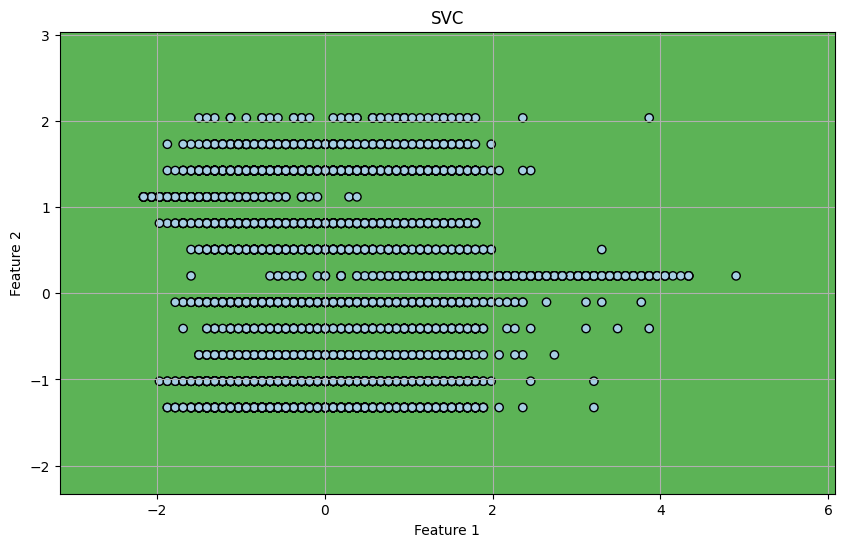

In [42]:
print("\nProcessing SVC")

X_vis = X_train_selected[:, :2]
y_vis = y_train
model = SVC()
grid = GridSearchCV(model, classification_models['SVC'], cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_vis, y_vis)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_selected[:, :2])

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

classification_result['SVC'] = {
    'Best Params': grid.best_params_,
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'Classification Report': report,
    'Confusion Matrix': cm
}

h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

X_vis_test = X_test_selected[:, :2]
plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolors='k')
plt.title('SVC')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()




Processing RandomForest


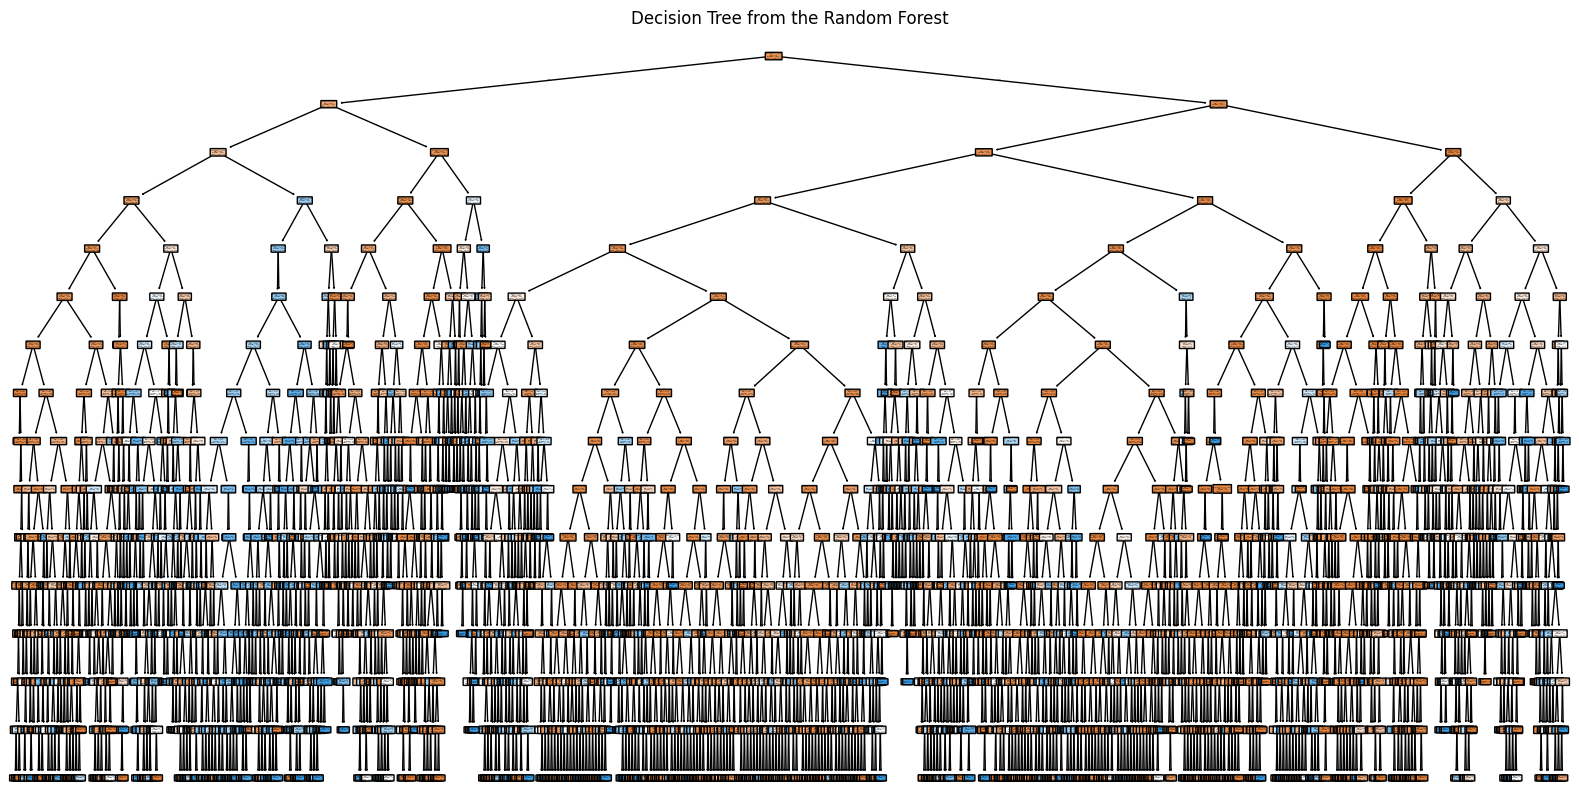

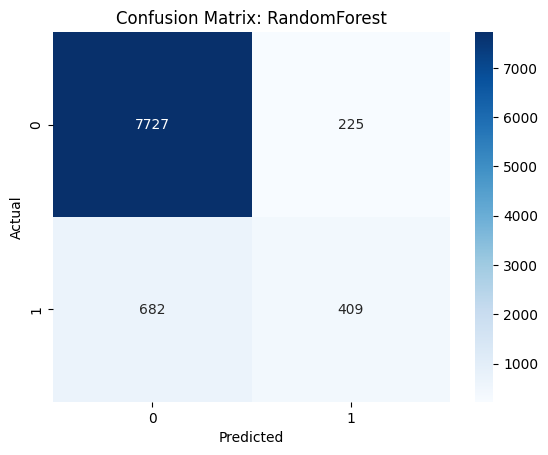

In [43]:
print("\nProcessing RandomForest")

model = RandomForestClassifier(random_state=42)
grid = GridSearchCV(model, classification_models['RandomForest'], cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_selected, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_selected)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

features = np.array(X.columns)[selector.get_support()]
class_names = ['no', 'yes']
tree = best_model.estimators_[0]

plt.figure(figsize=(20,10)) 
spt(tree, feature_names=features, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree from the Random Forest")
plt.show()

classification_result['RandomForest'] = {
    'Best Params': grid.best_params_,
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'Classification Report': report,
    'Confusion Matrix': cm
}

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: RandomForest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Processing XGBoost


c:\Users\Sila Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:55:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 1000x600 with 0 Axes>

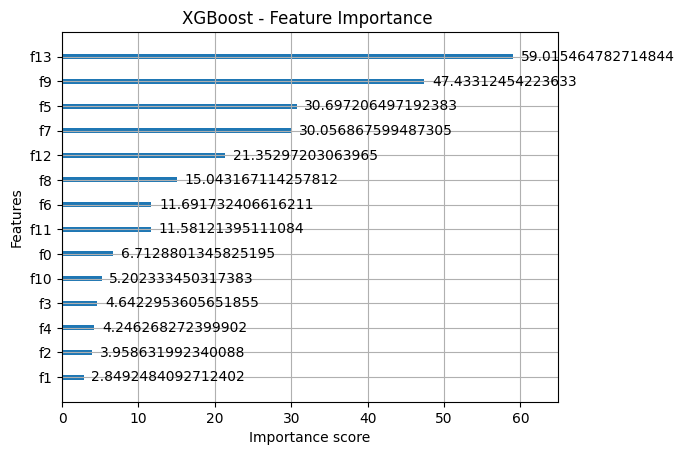

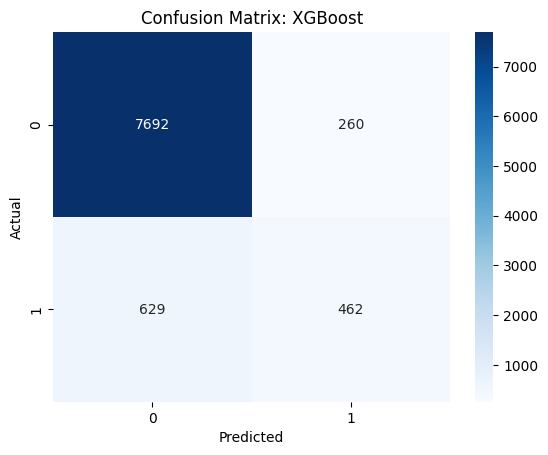

In [45]:
print("\nProcessing XGBoost")
from xgboost import plot_importance

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid = GridSearchCV(model, classification_models['XGBoost'], cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_selected, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_selected)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

plt.figure(figsize=(10,6))
plot_importance(best_model, importance_type='gain')
plt.title("XGBoost - Feature Importance ")
plt.grid(True)
plt.show()

classification_result['XGBoost'] = {
    'Best Params': grid.best_params_,
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'Classification Report': report,
    'Confusion Matrix': cm
}

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [46]:
#display evaluation for clasifications models
for name, metrics in classification_result.items():
    print(f"\n{name} Results:")
    for key, value in metrics.items():
        if isinstance(value, dict):
            print(f"{key}:")
            for label, scores in value.items():
                print(f"  {label}: {scores}")
        elif isinstance(value, np.ndarray):
            print(f"{key}:\n{value}")
        else:
            print(f"{key}: {value}")




KMeans (Clustering) Results:
Best Params:
  max_iter: 300
  n_init: 10
Confusion Matrix:
[[1268 6684]
 [ 377  714]]

SVC Results:
Best Params:
  C: 0.1
  kernel: linear
Accuracy: 0.8793541966161672
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification Report:
  0: {'precision': 0.8793541966161672, 'recall': 1.0, 'f1-score': 0.9358046484260076, 'support': 7952.0}
  1: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1091.0}
  accuracy: 0.8793541966161672
  macro avg: {'precision': 0.4396770983080836, 'recall': 0.5, 'f1-score': 0.4679023242130038, 'support': 9043.0}
  weighted avg: {'precision': 0.7732638031064648, 'recall': 0.8793541966161672, 'f1-score': 0.8229037448063268, 'support': 9043.0}
Confusion Matrix:
[[7952    0]
 [1091    0]]

RandomForest Results:
Best Params:
  max_depth: 15
  n_estimators: 500
Accuracy: 0.8997014265177485
Precision: 0.6451104100946372
Recall: 0.3748854262144821
F1 Score: 0.4742028985507246
Classification Report:
  0: {'precision': 0.918896